<a href="https://colab.research.google.com/github/butchland/fastai_nb_explorations/blob/master/TestKoryakinFingersModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Exploration notebooks for Fingers datasets

### No GPU needed for inferencing

## Environment setup

In [1]:
!curl https://course.fast.ai/setup/colab | bash

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   322  100   322    0     0   1618      0 --:--:-- --:--:-- --:--:--  1618
Updating fastai...
Done.


In [2]:
!pip install fastai2 --upgrade
!pip install fastcore --upgrade
!pip install nbdev --upgrade

     |████████████████████████████████| 184kB 2.7MB/s 
Requirement already up-to-date: fastcore in /usr/local/lib/python3.6/dist-packages (0.1.16)
     |████████████████████████████████| 51kB 1.6MB/s 


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
from fastai2.vision.all import *

In [0]:
escdrive = lambda x : x.as_posix().replace(' ','\ ')

In [0]:
gdrive = Path('/content/drive/My Drive/fastai_v4')

In [7]:
config = Config()
data_path = config.d['data_path']
archive_path = config.d['archive_path']
model_path = config.d['model_path']
(data_path, archive_path,model_path)

('/root/.fastai/data', '/root/.fastai/archive', '/root/.fastai/models')

## Load inferencing model

In [0]:
!mkdir -p models/koryakinp_fingers
!cp {escdrive(gdrive/'models'/'koryakinp_fingers'/'export.pkl')}  models/koryakinp_fingers

In [0]:
learner = load_learner('models/koryakinp_fingers/export.pkl')

In [10]:
list(learner.dls.vocab)

['0L', '0R', '1L', '1R', '2L', '2R', '3L', '3R', '4L', '4R', '5L', '5R']

### Load realworld testset

In [0]:
!cp {escdrive(gdrive/'data'/'fingers_testset.tgz')} {Path(data_path).as_posix()}


In [17]:

!tar -xvzf data/fingers_testset.tgz 

root/.fastai/data/fingers/
root/.fastai/data/fingers/testset/
root/.fastai/data/fingers/testset/orig/
root/.fastai/data/fingers/testset/orig/photo5_4L.jpg
root/.fastai/data/fingers/testset/orig/photo3_3L.jpg
root/.fastai/data/fingers/testset/orig/photo1_5L.jpg
root/.fastai/data/fingers/testset/orig/photo6_0L.jpg
root/.fastai/data/fingers/testset/orig/photo4_1L.jpg
root/.fastai/data/fingers/testset/orig/photo2_2L.jpg


In [0]:
mv root/.fastai/data/fingers data/.

In [20]:
test_img_files = get_image_files('data/fingers/testset/orig');test_img_files

(#6) [Path('data/fingers/testset/orig/photo5_4L.jpg'),Path('data/fingers/testset/orig/photo3_3L.jpg'),Path('data/fingers/testset/orig/photo1_5L.jpg'),Path('data/fingers/testset/orig/photo6_0L.jpg'),Path('data/fingers/testset/orig/photo4_1L.jpg'),Path('data/fingers/testset/orig/photo2_2L.jpg')]

In [0]:
pat = r'/[^/]+_([0-9RL]+).jpg$'
labeller = RegexLabeller(pat)

In [22]:
labeller(test_img_files[0])

'4L'

In [23]:
expected_results = [labeller(o) for o in test_img_files];expected_results

['4L', '3L', '5L', '0L', '1L', '2L']

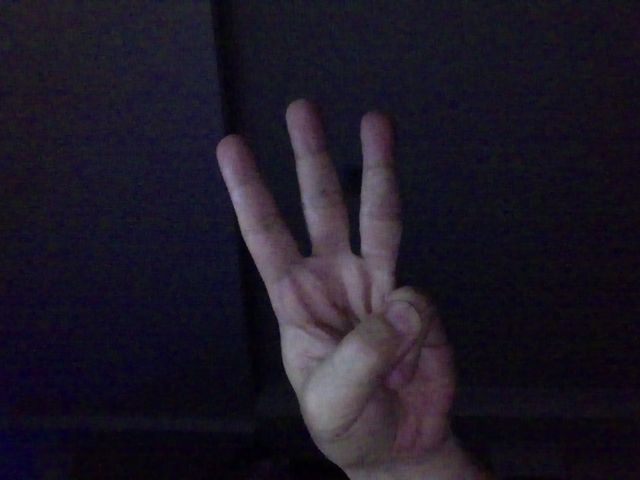

In [24]:
test_imgs = [PILImage.create(o) for o in test_img_files]; test_imgs[1]

In [25]:
test_imgs

[PILImage mode=RGB size=640x480,
 PILImage mode=RGB size=640x480,
 PILImage mode=RGB size=640x480,
 PILImage mode=RGB size=640x480,
 PILImage mode=RGB size=640x480,
 PILImage mode=RGB size=640x480]

In [26]:
pred_results = [learner.predict(o)[0] for o in test_imgs];(pred_results,expected_results)


(['3R', '2R', '2R', '3R', '3R', '3R'], ['4L', '3L', '5L', '0L', '1L', '2L'])

## Improve Prediction by matching realworld data with train data?

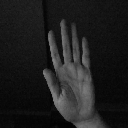

In [28]:
sm_bw_test_imgs = [PILImage(PILImageBW.create(o).reshape(128,128)) for o in test_img_files]; sm_bw_test_imgs[2]

In [29]:
pred_results2 = [learner.predict(o)[0] for o in sm_bw_test_imgs];(pred_results2,expected_results)

(['2R', '2R', '2R', '0R', '1R', '2R'], ['4L', '3L', '5L', '0L', '1L', '2L'])

In [0]:
!cp {(escdrive(gdrive/'data'/'koryakinp_fingers.tgz'))} data

In [0]:
!tar xvzf data/koryakinp_fingers.tgz

In [0]:
!mv root/.fastai/data/koryakinp_fingers data/.

In [0]:
valid_img_files = get_image_files('data/koryakinp_fingers/train')

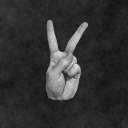

In [34]:
sm_bw_valid_imgs = [PILImage(PILImageBW.create(o).reshape(128,128)) for o in valid_img_files[:20]];sm_bw_valid_imgs[2]

In [35]:
learner.predict(sm_bw_valid_imgs[2])

('2L',
 tensor(4),
 tensor([8.0906e-11, 2.6660e-11, 9.9975e-09, 1.4935e-12, 1.0000e+00, 1.6463e-08,
         5.8665e-09, 1.0322e-11, 3.7459e-11, 7.4903e-12, 1.3482e-11, 1.1323e-10]))